<h1 align="center">
  <img src="https://readme-typing-svg.herokuapp.com?font=Pacifico&size=36&duration=3000&pause=1000&color=FF69B4&center=true&vCenter=true&width=800&lines=+Detección+de+Caras+con+Blur+" alt="Título animado" />
</h1>

Este proxecto consiste na creación dunha **aplicación de consola ou notebook** que:

Recolla unha imaxe  
Detecte automaticamente as caras presentes nela  
Aplique un **blur** sobre cada cara detectada para protexer a identidade das persoas  

O obxectivo é traballar conceptos básicos de **procesamento de imaxe e visión artificial** dun xeito práctico e visual.

---

In [22]:
import cv2 
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog



In [26]:

try:
    Tk().withdraw()
    path = filedialog.askopenfilename(
        title="Choose an image",
        filetypes=[("Imágenes", "*.jpg *.png *.jpeg")]
    )
except Exception as e:
    print("Can't open the file")
    raise e

if not path:
    print("You don't choose the image")
    exit()

image = cv2.imread(path)

if image is None:
    print("This type of image can't be load")
    exit()

Primero siempre convertir a gris la img


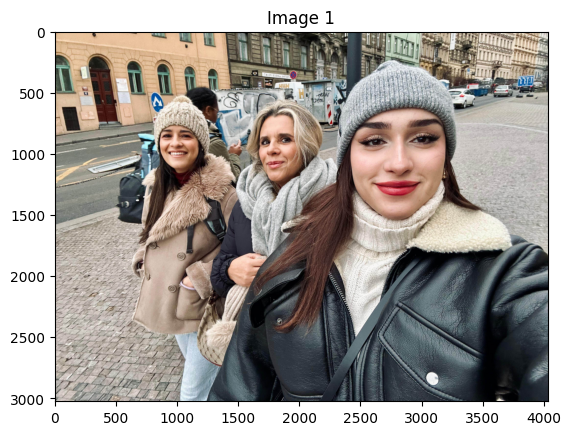

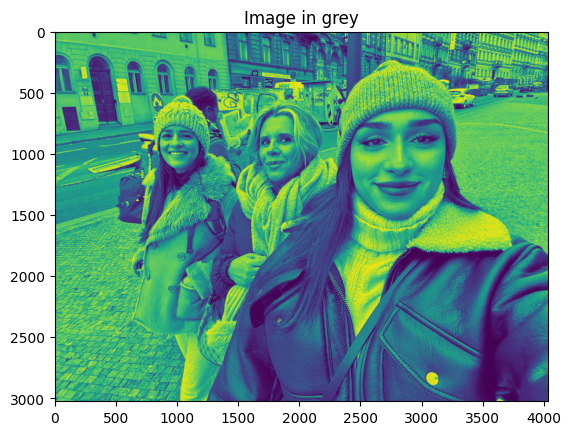

In [27]:
image_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

plt.imshow(image_color)
plt.title('Image 1')
plt.show()
plt.imshow(gray)
plt.title('Image in grey')
plt.show()

Detectamos las caras:
ACORDARSE DE :
->scaleFactor indica cuánto se reduce la imagen en cada paso para buscar la cara.
->minSize=(100, 100) este valor puede ser demasiado grande si tu foto no tiene mucha resolución o la cara está un poco lejos, etnmocnes hay que ajustarlo segun la foto 
cuando salen falsos positivos hay que tocar los parametros minneighbord y min size

Caras encontradas: 3


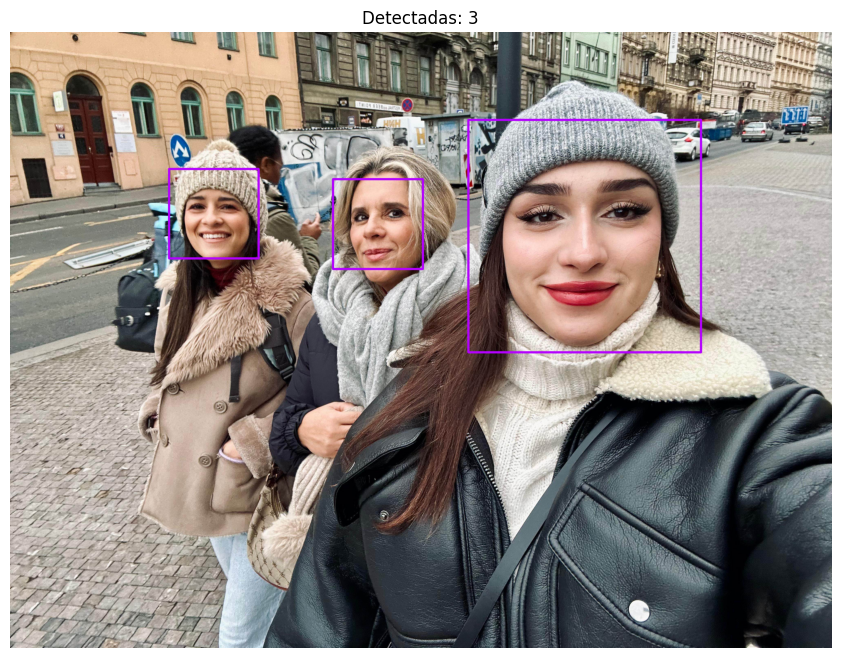

In [44]:
def buscarCaras(image):
    ruta_xml = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
    face_cascade = cv2.CascadeClassifier(ruta_xml)

    if len(image.shape) == 3:
        imaxe_gris = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        imaxe_gris = image

    #TODO MEJORAR CONTRASTE --ayuda si alguna cara tiene poca luz
    imaxe_gris = cv2.equalizeHist(imaxe_gris)


    faces = face_cascade.detectMultiScale(
        imaxe_gris,
        scaleFactor = 1.1,    # escaneo 
        minNeighbors = 15,     # estyo es para lo de los caras sean mas facil o mas minucioso de reconocer
        minSize = (30, 30)    # Tamaño mínimo pequeño
    )
    
    print(f"Caras encontradas: {len(faces)}")
    
    destiny = image.copy()
    colour = (180, 1, 255) 
    grosor = 10
    
    for (x,y,w,h) in faces:
        cv2.rectangle(destiny, (x,y), (x+w, y+h), colour, grosor)

    plt.figure(figsize=(12,8))
    plt.imshow(destiny)
    plt.title(f'Detectadas: {len(faces)}')
    plt.axis('off')
    plt.show()

imageColor = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
buscarCaras(imageColor)

Para borrado de caras usar el slicing ya que basicamente es que la img, es un array entonces le pasas la zona a hacer el blur

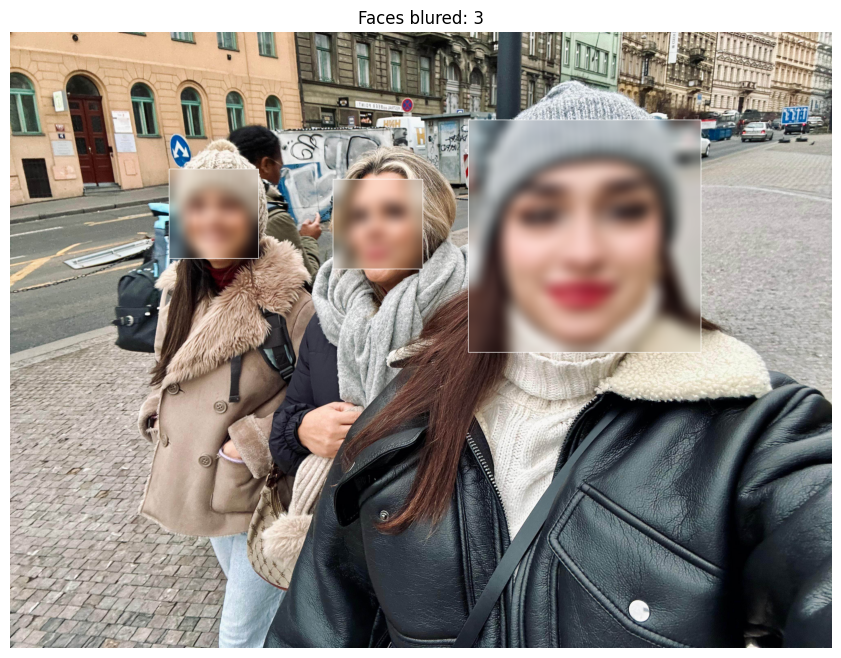

In [49]:
def borrarCaras(image):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    #Detectar 
    if len(image.shape) == 3:
        gris = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        gris = image
    gris = cv2.equalizeHist(gris) # Truco para la cara oscura

    faces = face_cascade.detectMultiScale(
        gris,
        scaleFactor = 1.1,    # escaneo 
        minNeighbors = 15,     # estyo es para lo de los caras sean mas facil o mas minucioso de reconocer
        minSize = (30, 30)    # Tamaño mínimo pequeño
    )
    
    # acordarse de hacer una copia para no dañar la img 
    destino = image.copy()

    # y ahora usamos el slicing
    for (x, y, w, h) in faces:
        
        # seleccionamos la cara con slicing 
        zona_cara = destino[y:y+h, x:x+w] 
        
        # aplicar el Blur a esas 
        zona_borrosa = cv2.GaussianBlur(zona_cara, (99, 99), 30)
        
        # y ahgora lo que hacemos e sponerle el borrado con clur sobre la img 
        destino[y:y+h, x:x+w] = zona_borrosa
        
    
        cv2.rectangle(destino, (x, y), (x+w, y+h), (255, 255, 255), 2)

    plt.figure(figsize=(12,8))
    plt.imshow(destino)
    plt.title(f'Faces blured: {len(faces)}')
    plt.axis('off')
    plt.show()


imageColor = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
borrarCaras(imageColor)

Explicaciones:

En faces ; cada elemento de esa lista representa un rectángulo (la cara detectada).

Para dibujar un rectángulo en un plano, necesitas obligatoriamente 4 números:
    
    x: La posición horizontal de la esquina superior izquierda.
    
    y: La posición vertical de la esquina superior izquierda.

    w (Width): El ancho de la cara.

    h (Height): La altura de la cara.

Entonces, for (x, y, w, h) in faces: significa: "Recorre todas las caras encontradas y, para cada una, saca estos 4 datos y guárdalos en las variables x, y, w, h".

destino[y:y+h, x:x+w]-> es la seleciion osea la parte concreta de la img 
